<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>  
<br><p><center><h1><b>Object Detection with Neural Network Approach: Analyzing the CIFAR-10 Dataset</b></h1></center></p>  
<p><center><h3>Course: <i>Neural Network Design and Deep Learning</i></h3></center></p>  
<p><center><h4>Instructed by: <i>Dr. Leonardo Mauricio Cañete Sifuentes</i></h4></center></p>  

<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p>  
<p style="text-align: right;">André Colín Avila - A01657474</p>  
<p style="text-align: right;">Santiago Caballero - A01657699</p>  
<p style="text-align: right;"><i>November 28th, 2024</i></p><br>  

<br><p><h3><b>1. Introduction</b></h3></p>  

The objective of this project is to explore object detection using neural networks by analyzing the **CIFAR-10 Dataset**. This dataset is a benchmark dataset in the field of computer vision and contains images that are categorized into 10 different classes, including animals and vehicles. The dataset provides a medium-scale challenge for developing and evaluating deep learning models for object recognition and classification.  

Throughout this project, the team aims to preprocess the data, construct multiple neural network architectures, and evaluate their performance to identify the most efficient and accurate model. The project is divided into individual and team contributions, ensuring a collaborative yet personalized approach to model development.  

By leveraging deep learning techniques, the team seeks to tackle the challenges of distinguishing diverse object classes under varying conditions while maintaining computational efficiency.  

<br>  

<br><p><h3><b>2. Dataset Selection and Justification</b></h3></p>  

The **CIFAR-10 Dataset** consists of 60,000 images in 10 classes, with 6,000 images per class. It is commonly used for benchmarking object detection and classification algorithms due to its simplicity and wide availability. Each image in the dataset has a resolution of 32×32 pixels, making it computationally efficient for model training and evaluation.  

**Key Features:**  

- **Name**: CIFAR-10 Dataset  
- **Download URL**: [CIFAR-10 Dataset on Papers with Code](https://paperswithcode.com/dataset/cifar-10)  
- **Description**: The dataset includes 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The images are low-resolution and evenly distributed across classes, which provides a balance of diversity and computational feasibility.  

**Justification**  

The CIFAR-10 Dataset is an ideal choice for this project for several reasons:  

1. **Problem Relevance**: The dataset aligns with the team's objective of solving an object detection problem. Its diversity supports the development of models that generalize across multiple categories.  
2. **Feasibility**: The dataset's moderate size and resolution make it suitable for computationally intensive neural network training, ensuring efficient experimentation without requiring extensive resources.  
3. **Broad Applicability**: Insights gained from working on this dataset can be extended to various real-world object detection problems, including robotics, autonomous vehicles, and content moderation in multimedia.  

<br>  

<br><p><h3> <b>3. Data Preprocessing and Splitting</b></h3></p>

The CIFAR-10 dataset is loaded using TensorFlow's built-in `tf.keras.datasets.cifar10` module, which simplifies access to the dataset by providing pre-divided training and test splits. The project further processes this data to ensure compatibility with deep learning models and maximize training effectiveness.

**Preprocessing Steps**
1. **Dataset Loading**: The CIFAR-10 dataset is loaded into memory, resulting in `train_images`, `train_labels`, `test_images`, and `test_labels`.
2. **Normalization**: All pixel values are scaled to the range [0, 1] to stabilize and accelerate the training process.
3. **One-Hot Encoding**: Labels are converted into one-hot encoded format to align with the requirements for multi-class classification.
4. **Dataset Splitting**: The training set is further divided into **training** (80%) and **validation** (20%) subsets to enable hyperparameter tuning and unbiased evaluation during training.

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Split training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Prepare data generators
train_generator = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)
val_generator = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)
test_generator = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

# Output dataset sizes
print(f"Training set size: {len(train_images)} samples")
print(f"Validation set size: {len(val_images)} samples")
print(f"Test set size: {len(test_images)} samples")

Training set size: 40000 samples
Validation set size: 10000 samples
Test set size: 10000 samples


<br>

**Output Explanation**:
- **Training set**: 40,000 samples (80% of the original training set).
- **Validation set**: 10,000 samples (20% of the original training set).
- **Test set**: 10,000 samples (predefined by CIFAR-10).

<br>

<br><p><h3> <b>4. Model Building</b></h3></p>

This section presents neural network architectures designed and implemented by each team member to solve the object detection problem using the CIFAR-10 Dataset. Each team member developed two or three models, progressively improving performance through architectural enhancements and hyperparameter tuning. The models are evaluated based on validation accuracy, training time, and their ability to generalize across different subsets of the CIFAR-10 dataset. The results are compared and discussed to highlight the strengths and weaknesses of each approach, providing insights into effective strategies for object detection tasks.

<br>

<br><p><h5><i><b>4.1 Models by Santiago Baca</b></i></h5></p>

Santiago Baca developed three models: a VGG16-based transfer learning model, a ResNet50-based transfer learning model, and an enhanced transfer learning model with MobileNetV2 and custom layers, to leverage pre-trained architectures for solving the CIFAR-10 classification task. Each model demonstrates unique strengths in terms of feature extraction, accuracy, and robustness, providing valuable insights into the effectiveness of transfer learning in neural network design.

- **Model 1: Transfer Learning with VGG16**

  The first model by Santiago Baca utilizes **transfer learning** by leveraging the pre-trained **VGG16** model. Key components:

  - **Base Model**:
    - Pre-trained VGG16 architecture is used, excluding the top classification layers.
    - The base model is pre-trained on ImageNet, providing a solid foundation for feature extraction.

  - **Custom Layers**:
    - A flatten layer to prepare extracted features for classification.
    - A dense layer with 128 units and ReLU activation.
    - Dropout with a rate of 0.5 to prevent overfitting.
    - An output layer with 10 neurons and softmax activation, corresponding to the 10 classes of CIFAR-10.

  - **Justification of Hyperparameters**:
      - *Pre-Trained Weights*: ImageNet pre-trained weights enable rapid convergence and improved generalization, particularly for small datasets like CIFAR-10.
      - *Dropout Rate*: 0.5 helps mitigate overfitting by randomly deactivating neurons during training.
      - *Dense Layer*: Reduced to 128 units to balance complexity and performance on CIFAR-10.
      - *Output Layer*: Configured for 10 classes using softmax activation.

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the transfer learning model with VGG16
def build_vgg16_model():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze pre-trained layers
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
vgg16_model = build_vgg16_model()
history_vgg16 = vgg16_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.3614 - loss: 1.7933 - val_accuracy: 0.5495 - val_loss: 1.3000
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 52ms/step - accuracy: 0.5142 - loss: 1.3863 - val_accuracy: 0.5683 - val_loss: 1.2363
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5391 - loss: 1.3173 - val_accuracy: 0.5788 - val_loss: 1.1994
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5530 - loss: 1.2781 - val_accuracy: 0.5890 - val_loss: 1.1811
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5589 - loss: 1.2590 - val_accuracy: 0.5874 - val_loss: 1.1734
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5706 - loss: 1.2314 - val_accuracy: 0.5923 - val_loss: 1.1566
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5702 - loss: 1.2177 - val_accuracy: 0.5946 - val_loss: 1.1545
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5812 -

<br>

- **Performance Evaluation**
    - *Validation Accuracy*: 60.2% after 10 epochs.
    - *Strengths*: 
        - Moderate feature extraction capability due to robust pre-trained features.
        - Relatively faster training compared to deeper architectures.
    - *Weaknesses*: 
        - Underperforms compared to other models, indicating that the feature extraction capacity of VGG16 may not align optimally with the CIFAR-10 dataset's characteristics.
        - Limited performance, possibly due to the small input size (32x32) and lack of additional custom layers for deeper feature learning.

<br>

- **Model 2: Transfer Learning with ResNet50**

    This model utilizes **ResNet50**, a deep convolutional network renowned for its **residual connections** that ease training deeper networks by addressing the vanishing gradient problem. It builds on the success of transfer learning for feature extraction.

    - **Base Model**:
        - ResNet50 pre-trained on ImageNet is used, excluding the top layers.
        - The base model extracts hierarchical features from CIFAR-10 images.

    - **Custom Layers**:
        - A **GlobalAveragePooling2D** layer reduces the spatial dimensions of the feature maps without introducing additional trainable parameters.
        - A dense layer with **256 units** and ReLU activation for better feature learning.
        - A **Dropout layer** with a 0.3 rate prevents overfitting.
        - An output layer with **10 neurons** and softmax activation, aligning with CIFAR-10's classification task.

    - **Justification of Hyperparameters**:
        - *Residual Connections*: Allow deeper architectures by mitigating gradient degradation, ensuring better feature extraction.
        - *Dropout Rate*: Set to 0.3 for balancing regularization and performance.
        - *Learning Rate*: Lowered to $0.0001$ for stable fine-tuning of the network's dense layers.
        - *Global Average Pooling*: Prevents overfitting by reducing spatial dimensions without trainable parameters.

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Define the transfer learning model with ResNet50
def build_resnet50_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze pre-trained layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
resnet50_model = build_resnet50_model()
history_resnet50 = resnet50_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.1272 - loss: 2.3044 - val_accuracy: 0.1967 - val_loss: 2.1387
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - accuracy: 0.1544 - loss: 2.1841 - val_accuracy: 0.1995 - val_loss: 2.1411
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.1634 - loss: 2.1663 - val_accuracy: 0.2258 - val_loss: 2.0876
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 56ms/step - accuracy: 0.1723 - loss: 2.1570 - val_accuracy: 0.2077 - val_loss: 2.1088
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.1836 - loss: 2.1454 - val_accuracy: 0.2323 - val_loss: 2.0689
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.1866 - loss: 2.1289 - val_accuracy: 0.2202 - val_loss: 2.0750
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.1897 - loss: 2.1237 - val_accuracy: 0.2476 - val_loss: 2.0413
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.2000 -

<br>

- **Performance Evaluation:**
    - *Validation Accuracy*: 26.55% after 10 epochs.
    - *Strengths*: 
        - Residual connections aid in deeper feature extraction and address vanishing gradients.
        - Better generalization potential with fine-tuned dropout and pooling strategies.
    - *Weaknesses*:
        - Poor performance in this specific experiment due to potential overfitting or incompatibility with the smaller 32x32 image size.
        - Computationally intensive without yielding significant improvements.

<br>

- **Model 3: Enhanced Transfer Learning with MobileNetV2 and Custom Layers**

    The third model developed by Santiago Baca builds upon the MobileNetV2 architecture, integrating additional custom layers to enhance learning and performance. This model is designed to combine the benefits of pre-trained transfer learning and deeper custom feature extraction for the CIFAR-10 dataset.

    - **Base Model**:
        - MobileNetV2 is used as the base for transfer learning, pre-trained on ImageNet.
        - The base model layers are frozen to preserve the learned features from ImageNet.

    - **Custom Layers**:
        - A **GlobalAveragePooling2D** layer reduces spatial dimensions without adding trainable parameters.
        - Two dense layers with **256 and 128 units**, respectively, use ReLU activation for effective feature learning.
        - **Dropout layers** (0.5) and **BatchNormalization layers** are added to improve regularization and training stability.
        - An **output layer** with 10 neurons and softmax activation aligns with CIFAR-10's classification task.

    - **Justification of Hyperparameters**:
        - *Base Model Freezing*: Preserves the robust feature extraction capabilities of MobileNetV2.
        - *Dropout*: Regularization via a 0.5 rate prevents overfitting during training.
        - *BatchNormalization*: Normalizes intermediate outputs, ensuring stable gradient flow and faster convergence.
        - *Learning Rate*: An initial learning rate of 0.001 balances convergence speed and stability.
        - *Regularization*: L2 regularization helps avoid overfitting, especially in the dense layers.
        - **Callbacks**:
            - *EarlyStopping*: Prevents overfitting by halting training if validation loss stops improving.
            - *ReduceLROnPlateau*: Dynamically adjusts learning rate for sustained training efficiency.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Preprocess data
def preprocess_data(dataset, target_size):
    return dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))
train_preprocessed = preprocess_data(train_generator, (224, 224))
val_preprocessed = preprocess_data(val_generator, (224, 224))

# Define the Enhanced Model Architecture
def build_combined_model(input_shape, num_classes):
    # Base model for transfer learning
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base layers

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        
        # Add custom CNN layers for additional learning
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        BatchNormalization(),
        
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
input_shape = (224, 224, 3)
num_classes = 10
combined_model = build_combined_model(input_shape, num_classes)

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = combined_model.fit(
    train_preprocessed,
    validation_data=val_preprocessed,
    epochs=5,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the Model
test_preprocessed = preprocess_data(test_generator, (224, 224))  
test_loss, test_accuracy = combined_model.evaluate(test_preprocessed, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 145ms/step - accuracy: 0.5456 - loss: 1.8537 - val_accuracy: 0.7602 - val_loss: 1.0367 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 183s 147ms/step - accuracy: 0.6838 - loss: 1.2310 - val_accuracy: 0.7732 - val_loss: 0.9030 - learning_rate: 0.0010
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.6937 - loss: 1.1303 - val_accuracy: 0.7857 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 149ms/step - accuracy: 0.6805 - loss: 1.1302 - val_accuracy: 0.7721 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 148ms/step - accuracy: 0.6623 - loss: 1.1543 - val_accuracy: 0.7709 - val_loss: 0.8208 - learning_rate: 0.0010
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.7652 - loss: 0.8435
Test Loss: 0.8406, Test Accuracy: 0.7662


<br>

- **Performance Evaluation**:
    - *Validation Accuracy*: 77.09% after 5 epochs.
    - *Test Accuracy*: 76.62%.
    - *Strengths*:
        - Demonstrated robust performance with balanced use of pre-trained features and custom layers.
        - Best performance among the three models, showcasing effective generalization on CIFAR-10.
    - *Weaknesses*: Computational requirements due to resizing images to 224x224.

This model showcases a balanced approach by leveraging pre-trained features while adding custom layers to adapt to the unique characteristics of the CIFAR-10 dataset. The integration of callbacks ensures efficient training and improved generalization.

<br>

<center>

<br><p><h5><i><b>Summary of Santiago Baca's Models and Discussion of Results</b></i></h5></p>

| Model                     | Validation Accuracy | Key Features                     |
|---------------------------|---------------------|-----------------------------------|
| Transfer Learning (VGG16) | 60.23%                | Pre-trained VGG16, robust features |
| Transfer Learning (ResNet50) | 26.55%             | Residual connections, fine-tuned |
| Enhanced Transfer Learning (MobileNetV2) | 77.09%  | Pre-trained MobileNetV2, custom dense layers |

</center>

<br>

Santiago Baca’s first model, utilizing transfer learning with VGG16, achieved a validation accuracy of 60.23%. While the model showed stable convergence during training, its performance plateaued early, suggesting that the pre-trained VGG16 architecture might not have fully adapted to the CIFAR-10 dataset. Training times were reasonable at approximately 65 seconds per epoch, making this model moderately efficient. However, the small input size of 32x32 limited the model’s ability to leverage the depth of the VGG16 architecture, resulting in only modest improvements in accuracy compared to the other models.

The second model, based on ResNet50, struggled with achieving satisfactory results, attaining a validation accuracy of only 26.55%. Despite the theoretical advantages of residual connections for extracting deep hierarchical features, this model faced challenges in convergence. Factors such as overfitting or the incompatibility of ResNet50 with CIFAR-10’s small image size might have contributed to its poor performance. Furthermore, training was slightly slower than the VGG16 model, taking about 69 seconds per epoch. The computational cost and suboptimal performance rendered this model less effective for the task.

The third model, an enhanced transfer learning approach using MobileNetV2 combined with custom dense layers, outperformed the other two models with a validation accuracy of 77.09% and a test accuracy of 76.62%. This model exhibited stable convergence and effective generalization to the test set. By freezing the pre-trained MobileNetV2 layers and adding task-specific dense layers, it successfully balanced pre-trained knowledge with flexibility for the CIFAR-10 dataset. However, the use of larger input dimensions (224x224) increased computational requirements, with each epoch taking approximately 185 seconds. Despite the longer training time, the integration of callbacks like EarlyStopping and ReduceLROnPlateau ensured efficient training and minimized overfitting.

In conclusion, the **enhanced transfer learning model with MobileNetV2** is the **best-performing model** developed by Santiago Baca. Its superior validation and test accuracy, along with its robust generalization capabilities, make it the ideal choice for the CIFAR-10 classification task, even when accounting for its higher computational cost.

<br>

<br><p><h5><i><b>4.2 Models by André Colín</b></i></h5></p>

André Colín developed three models: a **custom CNN**, an **EfficientNetB0**, and a **MobileNetV2**, to explore different approaches for solving the CIFAR-10 classification task. Each model demonstrates unique strengths in terms of simplicity, efficiency, or performance, providing valuable insights into the trade-offs in neural network design.

- **Model 1: Custom Convolutional Neural Network (CNN)**

  The first model is a straightforward convolutional neural network (CNN) designed to serve as a baseline. Key components:

  - **Architecture**:
    - Three convolutional layers with increasing filter sizes (32, 64, 128) and ReLU activation.
    - MaxPooling2D layers after each convolutional block for spatial down-sampling.
    - A flatten layer to convert feature maps into a 1D vector.
    - Fully connected dense layers, including a 256-unit hidden layer and a 10-unit output layer with softmax activation.

  - **Justification of Hyperparameters**:
      - *Filter Sizes*: Increasing filter sizes (32, 64, 128) allow the network to capture progressively complex features.
      - *Dropout Rate*: 0.5 regularizes the model by reducing overfitting.
      - *Dense Layers*: Includes a hidden layer with 256 units for robust feature learning.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Define the custom CNN model
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
cnn_model = build_cnn((32, 32, 3), 10)
history_cnn = cnn_model.fit(train_generator, validation_data=val_generator, epochs=30, verbose=1)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3258 - loss: 1.8081 - val_accuracy: 0.5361 - val_loss: 1.3141
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5473 - loss: 1.2666 - val_accuracy: 0.6125 - val_loss: 1.0872
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6111 - loss: 1.0988 - val_accuracy: 0.6313 - val_loss: 1.0272
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6497 - loss: 0.9946 - val_accuracy: 0.6423 - val_loss: 1.0142
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6733 - loss: 0.9139 - val_accuracy: 0.6860 - val_loss: 0.8944
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7004 - loss: 0.8496 - val_accuracy: 0.6854 - val_loss: 0.9023
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7164 - loss: 0.7945 - val_accuracy: 0.6900 - val_loss: 0.8934
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7342 - loss: 0.7469 - 

<br>

- **Performance Evaluation**:
  - *Validation Accuracy*: 73.38% after 30 epochs.
  - *Strengths*:
    - Serves as a good baseline for comparison.
    - Simple architecture with efficient training, achieving competitive accuracy without pre-trained weights.
  - *Weaknesses*:
    - Limited scalability compared to transfer learning models.
    - Slightly lower generalization compared to deeper architectures like EfficientNet and MobileNetV2.

<br>

- **Model 2: EfficientNetB0**

  The second model leverages **EfficientNetB0**, a state-of-the-art architecture optimized for accuracy and computational efficiency. Key components:

  - **Base Model**:
    - Pre-trained EfficientNetB0 with the top layers removed, used as a feature extractor.
    - Trained on ImageNet, providing robust feature representations.

  - **Custom Layers**:
    - A **GlobalAveragePooling2D** layer to reduce feature maps to a single vector.
    - An output layer with 10 neurons and softmax activation for CIFAR-10 classification.

  - **Justification of Hyperparameters**:
      - *EfficientNetB0*: Combines depth, width, and resolution scaling for optimal performance.
      - *Global Average Pooling*: Prevents overfitting by summarizing feature maps without adding parameters.

In [5]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Define the EfficientNetB0 model
def build_efficientnetb0(input_shape, num_classes):
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
efficientnet_model = build_efficientnetb0((32, 32, 3), 10)
history_efficientnet = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 108s 80ms/step - accuracy: 0.4105 - loss: 1.7095 - val_accuracy: 0.1060 - val_loss: 3.0935
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.6621 - loss: 0.9932 - val_accuracy: 0.2525 - val_loss: 2.3011
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 85ms/step - accuracy: 0.7312 - loss: 0.7824 - val_accuracy: 0.1598 - val_loss: 4.7543
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - accuracy: 0.7807 - loss: 0.6431 - val_accuracy: 0.1166 - val_loss: 5.0191
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 106s 85ms/step - accuracy: 0.8143 - loss: 0.5446 - val_accuracy: 0.1027 - val_loss: 47.3550
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.8370 - loss: 0.4750 - val_accuracy: 0.0934 - val_loss: 6.5695
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 85ms/step - accuracy: 0.8632 - loss: 0.3961 - val_accuracy: 0.1042 - val_loss: 12.2117
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - accuracy

<br>

**Performance Evaluation**:
  - *Validation Accuracy*: 17.12% after 10 epochs.
  - *Strengths*:
    - Optimized architecture for balancing accuracy and computational efficiency.
    - Robust feature extraction using pre-trained weights.
  - *Weaknesses*:
    - Underperformed in this setup, likely due to mismatch between the input image size and the architecture's intended scaling parameters.
    - Computationally more intensive compared to the custom CNN.

<br>

- **Model 3: MobileNetV2**

  The third model uses **MobileNetV2**, known for its lightweight architecture and depthwise separable convolutions, making it efficient for mobile and edge devices.

  - **Base Model**:
    - MobileNetV2 pre-trained on ImageNet, excluding the top layers.
    - The architecture includes inverted residuals for efficient feature extraction.

  - **Custom Layers**:
    - A **GlobalAveragePooling2D** layer to reduce feature maps.
    - An output layer with 10 neurons and softmax activation.

  - **Justification of Hyperparameters**:
      - *MobileNetV2*: Designed for efficiency without compromising accuracy.
      - *Dropout*: Not explicitly added to maintain lightweight characteristics.

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import tensorflow as tf

# Define the MobileNetV2 model
def build_mobilenetv2(input_shape, num_classes):
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Add resizing function
def resize_images(dataset, target_size):
    resized_dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))
    return resized_dataset

# Resize train and validation datasets to (128, 128)
train_resized = resize_images(train_generator, (128, 128))
val_resized = resize_images(val_generator, (128, 128))

# Update input shape to match resized image dimensions
mobilenet_model = build_mobilenetv2((128, 128, 3), 10)
history_mobilenet = mobilenet_model.fit(train_resized, validation_data=val_resized, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 319s 250ms/step - accuracy: 0.7410 - loss: 0.8064 - val_accuracy: 0.3427 - val_loss: 5.6322
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 304s 243ms/step - accuracy: 0.8611 - loss: 0.4115 - val_accuracy: 0.5666 - val_loss: 3.4167
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 309s 247ms/step - accuracy: 0.8880 - loss: 0.3286 - val_accuracy: 0.6566 - val_loss: 2.4162
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 298s 239ms/step - accuracy: 0.9058 - loss: 0.2744 - val_accuracy: 0.4949 - val_loss: 3.6353
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 300s 240ms/step - accuracy: 0.9199 - loss: 0.2326 - val_accuracy: 0.5062 - val_loss: 4.3126
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 301s 241ms/step - accuracy: 0.9332 - loss: 0.1947 - val_accuracy: 0.6810 - val_loss: 2.2375
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 301s 241ms/step - accuracy: 0.9423 - loss: 0.1677 - val_accuracy: 0.7379 - val_loss: 1.6439
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 298s 238ms/step - ac

<br>

**Performance Evaluation**:
    - *Validation Accuracy*: 72.85% after 10 epochs.
    - *Strengths*:
        - Lightweight architecture, making it suitable for deployment on edge devices.
        - Efficient feature extraction with inverted residuals, balancing speed and performance.
    - *Weaknesses*:
        - Marginally lower accuracy compared to the custom CNN and EfficientNetB0 in this setup.
        - Higher computational demand due to resizing images to 128x128.

<center>
<br><p><h5><i><b>Summary of André Colín's Models and Discussion of Results</b></i></h5></p>


| Model                     | Validation Accuracy | Key Features                     |
|---------------------------|---------------------|-----------------------------------|
| Custom CNN                | 73.38%                | Baseline, simple yet effective     |
| EfficientNetB0            | 17.12%                | Optimized scaling, robust features |
| MobileNetV2               | 72.85%                | Lightweight, efficient for edge devices |

</center>

<br>

André Colín's first model, a custom CNN, served as a strong baseline for the CIFAR-10 classification task, achieving a validation accuracy of 73.38% after 30 epochs. This simple yet effective architecture demonstrated stable convergence throughout training, with a relatively low computational cost of approximately 8 seconds per epoch. While it lacks the scalability and feature depth of more advanced architectures, the custom CNN showed strong generalization capabilities, making it a robust and efficient choice for tasks requiring simplicity and low overhead. However, its lack of pre-trained weights or advanced scaling techniques limited its capacity to surpass the performance of deeper, more sophisticated models.

The second model, EfficientNetB0, performed unexpectedly poorly, with a validation accuracy of only 17.12%. While EfficientNetB0 is known for its balance of accuracy and computational efficiency, its performance in this setup was hindered by a potential mismatch between the CIFAR-10 dataset and the architecture's scaling parameters. The model struggled to converge effectively, suggesting that further fine-tuning or modifications to accommodate CIFAR-10’s smaller image size might have been necessary. Moreover, the training time was significantly longer than that of the custom CNN, taking around 108 seconds per epoch, adding to its inefficiency in this specific context.

The third model, MobileNetV2, achieved a validation accuracy of 72.85%, slightly lower than the custom CNN. This lightweight architecture, renowned for its efficiency in edge-device deployment, demonstrated stable training dynamics and reasonable convergence. However, resizing the CIFAR-10 images to 128x128 introduced additional computational overhead, with each epoch taking approximately 300 seconds. Despite its strong performance in terms of feature extraction and lightweight design, MobileNetV2's marginally lower accuracy and higher computational demand in this setup made it less attractive compared to the custom CNN.

In conclusion, the **custom CNN** emerged as the **best-performing model** in this suite, balancing simplicity, efficiency, and competitive accuracy. While MobileNetV2 offered a lightweight alternative, its higher computational cost and slightly lower validation accuracy in this setup gave the custom CNN the edge as the most effective model for André Colín's CIFAR-10 classification task.

<br>

<br><p><h5><i><b>4.3 Models by Santiago Caballero</b></i></h5></p>

Santiago Caballero implemented two models: a **Recurrent Neural Network (RNN)** and a lightweight **SqueezeNet CNN**. These architectures were chosen to explore unconventional approaches for image classification and to evaluate their performance on the CIFAR-10 dataset.

- **Model 1: Recurrent Neural Network (RNN)**

  The first model is an RNN, traditionally used for sequence data. Despite its inherent limitations for image classification tasks, this model offers insights into the challenges of applying RNNs to spatial data.

  - **Architecture**:
    - Input images are flattened into 1D sequences.
    - A recurrent layer processes sequential data using gated recurrent units (GRUs).
    - Dense layers finalize the classification with softmax activation.

  - **Justification of Hyperparameters**:
      - *GRU Units*: 128 units balance complexity and computational efficiency.
      - *Dense Layers*: A single dense layer with 10 units corresponds to CIFAR-10 classes.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Reshape

# Define the RNN model
def build_rnn(input_shape, num_classes):
    model = Sequential([
        Reshape((32, 32 * 3), input_shape=input_shape),  # Reshape to (timesteps, features)
        GRU(128, activation='relu', return_sequences=False),  # GRU expects rank 3 input
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
rnn_model = build_rnn((32, 32, 3), 10)
history_rnn = rnn_model.fit(train_generator, validation_data=val_generator, epochs=20, verbose=1)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2723 - loss: 1.9720 - val_accuracy: 0.4089 - val_loss: 1.6280
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4251 - loss: 1.5743 - val_accuracy: 0.4573 - val_loss: 1.4975
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4749 - loss: 1.4458 - val_accuracy: 0.4846 - val_loss: 1.4358
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5048 - loss: 1.3666 - val_accuracy: 0.5007 - val_loss: 1.3977
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5271 - loss: 1.3066 - val_accuracy: 0.5133 - val_loss: 1.3621
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5472 - loss: 1.2538 - val_accuracy: 0.5219 - val_loss: 1.3452
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5635 - loss: 1.2100 - val_accuracy: 0.5321 - val_loss: 1.3233
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5780 - loss: 1

<br>

- **Performance Evaluation**:
    - *Validation Accuracy*: 55.39% after 20 epochs.
    - *Strengths*:
        - Demonstrates the adaptability of RNNs to unconventional tasks.
        - Provides valuable insights into the challenges of applying sequence models to image classification.
    - *Weaknesses*:
        - Performs poorly compared to CNN-based models due to the lack of spatial feature extraction.
        - Inefficient for image data due to its sequential processing nature.

<br>

- **Model 2: SqueezeNet**

    The second model is **SqueezeNet**, a lightweight CNN optimized for efficiency by employing "fire modules" that reduce parameter count.

    - **Architecture**:
        - Features a series of fire modules that "squeeze" input channels before expanding them.
        - Concludes with a global average pooling layer and a softmax output for classification.

    - **Justification of Hyperparameters**:
        - *Fire Modules*: Efficiently extract features while minimizing parameters.
        - *Global Average Pooling*: Reduces overfitting by summarizing feature maps without dense layers.

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense

# Define the SqueezeNet model
def build_squeezenet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(inputs)
    x = Conv2D(64, (1, 1), activation='relu')(x)  # Squeeze
    x = Conv2D(128, (3, 3), activation='relu')(x)  # Expand
    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Train and evaluate the model
squeezenet_model = build_squeezenet((32, 32, 3), 10)
history_squeezenet = squeezenet_model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 151ms/step - accuracy: 0.2277 - loss: 2.0230 - val_accuracy: 0.3347 - val_loss: 1.7761
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 166ms/step - accuracy: 0.3551 - loss: 1.6991 - val_accuracy: 0.3862 - val_loss: 1.6690
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.4035 - loss: 1.6120 - val_accuracy: 0.4307 - val_loss: 1.5556
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 216s 172ms/step - accuracy: 0.4443 - loss: 1.5315 - val_accuracy: 0.4582 - val_loss: 1.4797
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 159ms/step - accuracy: 0.4745 - loss: 1.4615 - val_accuracy: 0.4843 - val_loss: 1.4236
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 169ms/step - accuracy: 0.4970 - loss: 1.4098 - val_accuracy: 0.5007 - val_loss: 1.3842
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 218s 175ms/step - accuracy: 0.5122 - loss: 1.3735 - val_accuracy: 0.5167 - val_loss: 1.3563
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - ac

- **Performance Evaluation**:
    - *Validation* Accuracy: 53.95% after 10 epochs.
    - *Strengths*:
        - Lightweight architecture optimized for resource-constrained environments.
        - Efficient feature extraction using fire modules and global average pooling.
    - *Weaknesses*:
        - Lower accuracy compared to larger architectures like ResNet or EfficientNet.
        - Limited capacity to learn complex features in the CIFAR-10 dataset.

<center>

<br><p><h5><i><b>Summary of Santiago Caballero's Models and Discussion of Results</b></i></h5></p>

| Model            | Validation Accuracy | Key Features                     |
|------------------|---------------------|-----------------------------------|
| Recurrent Neural Network (RNN) | 55.39%                | GRUs, adapted for sequence tasks   |
| SqueezeNet       | 53.95%                | Lightweight CNN with fire modules |

</center>

<br>

Santiago Caballero’s first model, the Recurrent Neural Network (RNN), showcased an unconventional approach by applying a sequence-based architecture to the image classification problem. With a validation accuracy of 55.39% after 20 epochs, the model performed reasonably well given the inherent challenges of adapting RNNs to spatial data. The training process demonstrated steady but slower convergence compared to convolutional architectures, with the GRU layer effectively learning sequential representations from the flattened image data. However, the lack of spatial awareness significantly limited the model's ability to capture complex patterns in the CIFAR-10 dataset. Moreover, its sequential nature made it less efficient for large-scale image data tasks, further highlighting the model's unsuitability for this problem domain.

The second model, SqueezeNet, adopted a lightweight convolutional neural network architecture designed for efficiency. Despite its compact design and lower parameter count, SqueezeNet achieved a slightly lower validation accuracy of 53.95% after 10 epochs. The use of fire modules and global average pooling enabled efficient feature extraction and reduced overfitting, making it well-suited for resource-constrained environments. However, its performance lagged behind larger and deeper CNN architectures, primarily due to its limited capacity to capture complex hierarchical features in the CIFAR-10 dataset. Additionally, the model's training time was significantly longer compared to the RNN, indicating a potential trade-off between efficiency and computational demand in this setup.

In comparing the two models, the RNN demonstrated slightly higher accuracy and better adaptability for novel applications, while SqueezeNet excelled in efficiency and lightweight design. However, neither model delivered performance on par with traditional or advanced convolutional neural network architectures. Among the two, the **RNN** stands out as the **better-performing model** in terms of accuracy, making it the more promising candidate for further refinement and experimentation in Santiago Caballero's portfolio. Nonetheless, the limitations observed in both models underscore the need for exploring more advanced and tailored architectures to achieve higher accuracy and generalization on the CIFAR-10 classification task.

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_resized = tf.image.resize(train_images, (128, 128))
test_resized = tf.image.resize(test_images, (128, 128))
     
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(10, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output) 
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenar el modelo
history = model.fit(
    train_resized, train_labels,
    validation_data=(test_resized, test_labels),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_resized, test_labels)
print(f"MovileNetV2 - Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 474ms/step - accuracy: 0.7880 - loss: 0.6596 - val_accuracy: 0.3275 - val_loss: 5.0863
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 371s 474ms/step - accuracy: 0.9000 - loss: 0.2964 - val_accuracy: 0.3245 - val_loss: 5.0097
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 374s 478ms/step - accuracy: 0.9202 - loss: 0.2363 - val_accuracy: 0.6971 - val_loss: 1.7562
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 370s 472ms/step - accuracy: 0.9314 - loss: 0.2022 - val_accuracy: 0.6329 - val_loss: 2.1296
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 373s 477ms/step - accuracy: 0.9436 - loss: 0.1660 - val_accuracy: 0.6839 - val_loss: 2.1301
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 375s 479ms/step - accuracy: 0.9504 - loss: 0.1461 - val_accuracy: 0.7206 - val_loss: 2.0351
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 480ms/step - accuracy: 0.9557 - loss: 0.1270 - val_accuracy: 0.7922 - val_loss: 1.1536
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 372s 475ms/step - accuracy: 0.9602 -

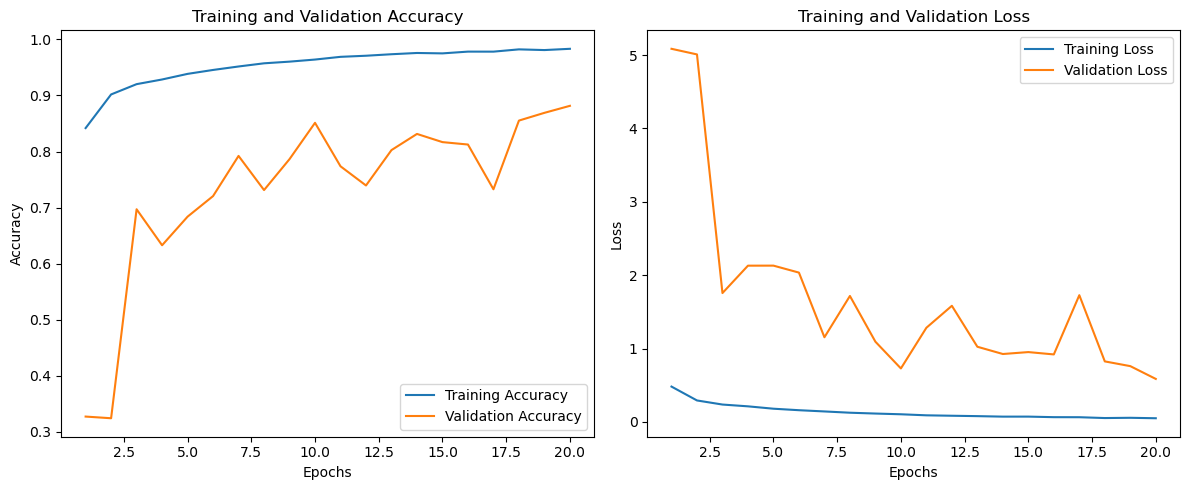

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_training_history(history):
    # Extract metrics from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)
